In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()  # for plot styling
from matplotlib import pyplot as plt
#plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
#importing the dataset
data = pd.read_csv(r'C:\Users\saqla\Desktop\Python Certification for Data Science\In Class Practice Codes\10. Module 10\m10_toupload\movie_metadata1.csv')
print (data.shape)
data.head()

(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,49,12,7.1,49.00,0


In [2]:
data['director_facebook_likes'].head(10)

0        0
1      563
2        0
3    22000
4      131
5      475
6        0
7       15
8        0
9      282
Name: director_facebook_likes, dtype: int64

In [3]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [4]:
newdata=data.iloc[:,4:6]
newdata.head(10)

,director_facebook_likes,actor_3_facebook_likes
0,0,855
1,563,1000
2,0,161
3,22000,23000
4,131,49
5,475,530
6,0,4000
7,15,284
8,0,19000
9,282,10000


In [5]:
# Using the KMeans from sklearn
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=5)

In [7]:
kmeans.fit(newdata)

KMeans(n_clusters=5)

In [8]:
kmeans.cluster_centers_
#print(len(kmeans.cluster_centers_))

array([[  151.29382199,   420.67350785],
       [17621.21212121,   596.10606061],
       [  210.77011494, 11126.43678161],
       [17545.45454545, 14545.45454545],
       [12490.38461538,   605.93269231]])

In [9]:
print (kmeans.labels_)
print (len(kmeans.labels_))

[0 0 0 ... 0 0 0]
5043


In [10]:
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 4775, 1: 66, 2: 87, 3: 11, 4: 104}


D:\Anaconda\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


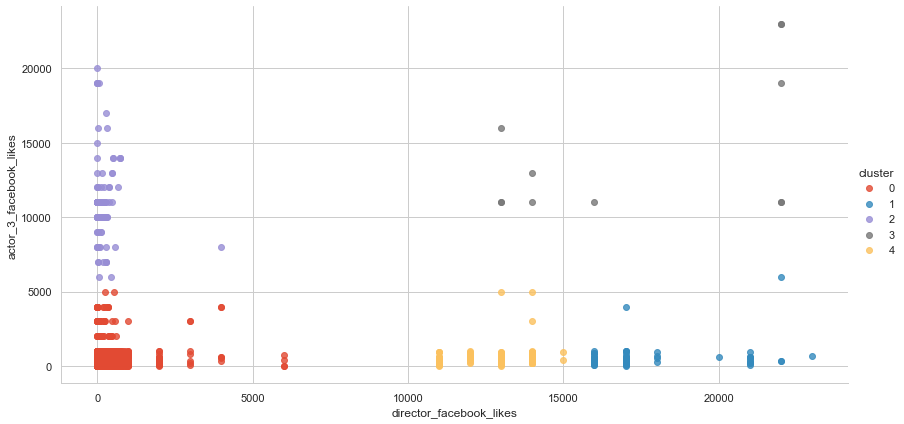

In [11]:
# plot the data 
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('director_facebook_likes', 'actor_3_facebook_likes',data=newdata, hue='cluster',
           size=6,aspect=2,fit_reg=False)

## Elbow Method
### Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters' centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow.

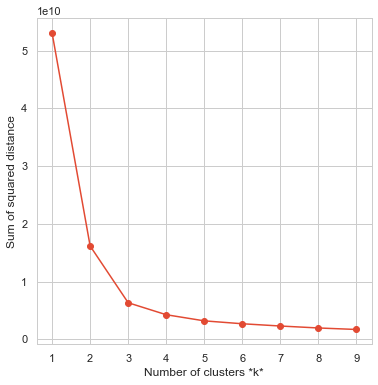

In [12]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(newdata)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');


## Below are the main takeaways:

### Scale/standardize the data when applying kmeans algorithm.
### Elbow method in selecting number of clusters doesn't usually work because the error function is monotonically decreasing for all k's.
### Kmeans gives more weight to the bigger clusters.
### Kmeans assumes spherical shapes of clusters (with radius equal to the distance between the centroid and the furthest data point) and doesn't work well when clusters are in different shapes such as elliptical clusters.
### If there is overlapping between clusters, kmeans doesn't have an intrinsic measure for uncertainty for the examples belong to the overlapping region in order to determine for which cluster to assign each data point.
### Kmeans may still cluster the data even if it can't be clustered such as data that comes from uniform distributions.